# Модули

In [172]:
import trial_division as tr_div
import miller as mlr
import miller_rabin as mlr_rbn
import solovay_strassen as slv_strssn
import sympy as smp
import time
import matplotlib.pyplot as plt
from statistics import mean

# [Данные для тестирования](https://bigprimes.org/)

In [164]:
n = 10
x = range(n)
list_of_fifteen_digit_nums = [389558978862271, 796078908052627, 444288043537153, 414237402333977, 554377497879743, 507484035127417, 862966705909643, 669799844233001, 219291884523839, 753094264992107]
list_of_ = [4642335989045082779660896974173736114319, 4642335989045082779660896974173736114319]
list_of_three_hundred_digit_nums = [632378608490660441193313740450697783223926392258307400192044827408262423064534558805964134281039743999266997839029482243699868222088123214356567951468658704038499288829237275794544311932580961341948934513975847854816648207950122089539455338681679471473328905258990387177811561027933406865873733694641, 356388522714622607254531944974357108297598405214477257887957394307589455305929176165424340238136706807428571484995522059293561786453169999221194084413782554077283011333366077288804712610372624287947937882922345740589349065004846048524157157939936089535421434019767769678218773226696339170650270312979, 859476666496863386931917166222693982467125475455542591878181430119168115433394745176894862042126129081603043064595484477518268400801021098211470822483412098065036280624826281334460838046033163198475757113886360339788417918721458176710836070281747932846085305020386593837939771866055689124771928758393, 292800248334346598269637079370174994230355474544608925864658379183184925945669285102083465220395508058963666513502034227079332513970339175453219030289197388078683829824785483989445533645928263518027356489181819177357698879096750253321435967796257966119410653248846338726442179989024969349710821357689, 238103101550866427668957423502287686617464931300495242948964400547393678713581636871212595994051283291212617960993606720372901105106247698246467318468171581767279120788096325093710304065135270199588187609051334410521344811213027209858658758222150260340749639652386985694158656620618149872146542411291, 269174901992023646041748250674313043644553684565874227398571793095530547380643232383385862464261142636287931461585149674184905557838066179319631773267797935904468787506712082489612441148920968238967635387043779490599694544986937969476028663720352451702067806691078643651866956592753688318934733499701, 517615251264367596116904246465237155519173173121965505268895509796303905654439940891191783173823689062629152339033505179465243705361138112486276497522839780635410436667967999706883112711703073603307696993895352226545023571204176424799655372479454136316079013042522173823714630927565183790585092582763, 743254590922133453215103321449253585145260800859901927552234506032363505649981527225434198280931905482591922140096199109691498265647300813180110037799984300941767634797550367424712000407387566202034079245882057504915177082344603881809400508417367824627719530489767302346211580144706440351001896079141, 127133481862839016415394161399146201222518286756713485342811573822158211642814154746139838540665873747445139193807850701249941922064387397453013333266244867635257938494369741839379759827018041103945097941269658084400794162612377021759958162732091425951450834309898100775162830645510002891764393514561, 261219638893571404056630657119043789603899749747574252807621019649755749585943730567590534888405262603364366301664820325713336728144512010143723352904235097340490636310626940361564105325487243790613310834556702776072426805755641795495315052686197634268728492440364725794695744555209068261801618121449]

# Trial division

## Проверка

In [135]:
for num in list_of_fifteen_digit_nums:
    print(tr_div.trial_division(num))

True
True
True
True
True
True
True
True
True
True


In [136]:
for num in list_of_fifteen_digit_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


## Время

In [137]:
tr_div_time = []
for num in list_of_fifteen_digit_nums:
    temp_start = time.time()
    tr_div.trial_division(num)
    tr_div_time += [time.time() - temp_start]

In [138]:
print('Среднее время на проверку каждого числа алгоритмом trial-division:', mean(tr_div_time))

Среднее время на проверку каждого числа алгоритмом trial-division: 13.349683952331542


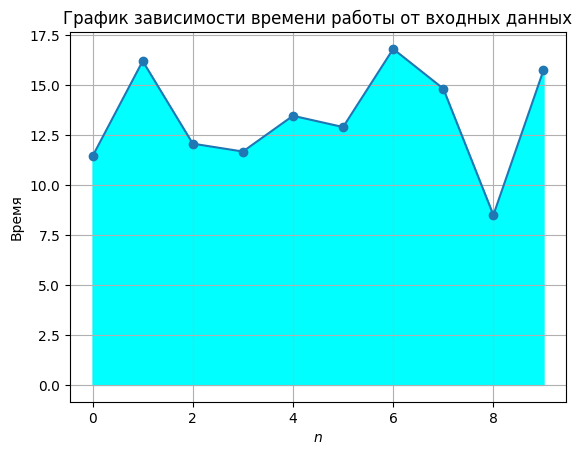

In [139]:
plt.plot(x, tr_div_time, '-o')
plt.fill_between(x, tr_div_time, color='cyan')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()

# Miller-Rabin

## Проверка

In [151]:
for num in list_of_three_hundred_digit_nums:
    print(mlr_rbn.miller_rabin(num))

True
True
True
True
True
True
True
True
True
True


In [152]:
for num in list_of_three_hundred_digit_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


## Время

In [153]:
mlr_rbn_time = []
for num in list_of_three_hundred_digit_nums:
    temp_start = time.time()
    mlr_rbn.miller_rabin(num)
    mlr_rbn_time += [time.time() - temp_start]

In [154]:
print('Среднее время на проверку каждого числа алгоритмом Miller-Rabin:', mean(mlr_rbn_time))

Среднее время на проверку каждого числа алгоритмом Miller-Rabin: 0.07342960834503173


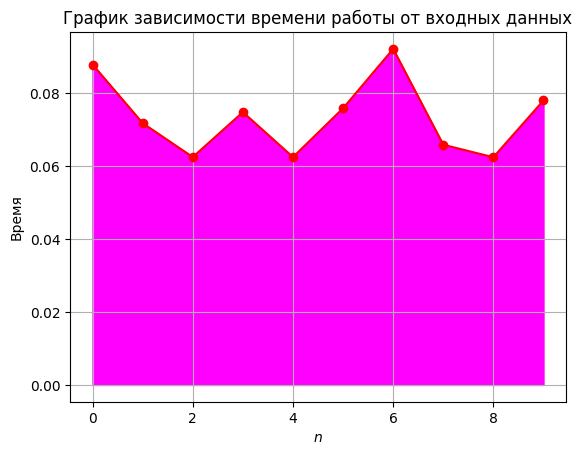

In [155]:
plt.plot(x, mlr_rbn_time, '-ro')
plt.fill_between(x, mlr_rbn_time, color='magenta')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()

# Miller

## Проверка

In [167]:
for num in list_of_three_hundred_digit_nums:
    print(mlr_rbn.miller_rabin(num))

True
True
True
True
True
True
True
True
True
True


In [168]:
for num in list_of_three_hundred_digit_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


## Время

In [169]:
mlr_time = []
for num in list_of_three_hundred_digit_nums:
    temp_start = time.time()
    mlr.miller(num)
    mlr_time += [time.time() - temp_start]

In [180]:
print('Среднее время на проверку каждого числа алгоритмом Miller:', mean(mlr_time))

Среднее время на проверку каждого числа алгоритмом Miller: 0.07110772132873536


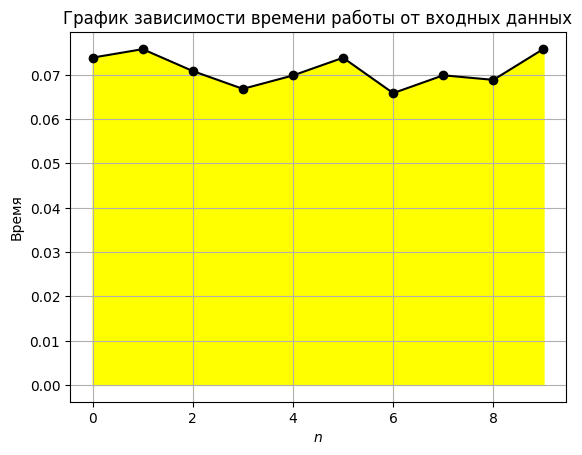

In [181]:
plt.plot(x, mlr_time, '-ko')
plt.fill_between(x, mlr_time, color='yellow')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()

# Solovay-Strassen

## Проверка

In [182]:
for num in list_of_three_hundred_digit_nums:
    print(slv_strssn.solovay_strassen(num, n))

True
True
True
True
True
True
True
True
True
True


In [183]:
for num in list_of_three_hundred_digit_nums:
    print(smp.isprime(num))

True
True
True
True
True
True
True
True
True
True


## Время

In [184]:
slv_strssn_time = []
for num in list_of_three_hundred_digit_nums:
    temp_start = time.time()
    slv_strssn.solovay_strassen(num, n)
    slv_strssn_time += [time.time() - temp_start]

In [185]:
print('Среднее время на проверку каждого числа алгоритмом Solovay-Strassen:', mean(slv_strssn_time))

Среднее время на проверку каждого числа алгоритмом Solovay-Strassen: 0.12748377323150634


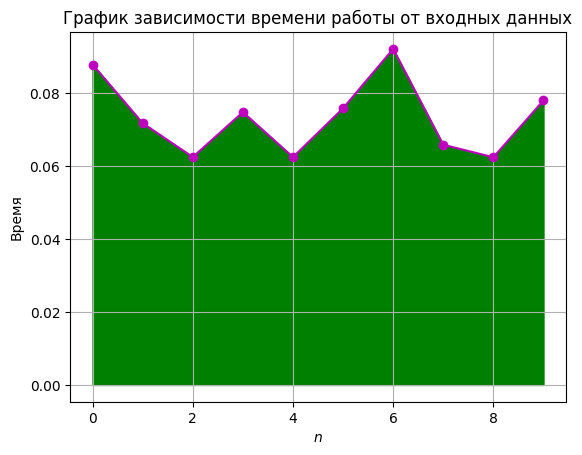

In [187]:
plt.plot(x, mlr_rbn_time, '-mo')
plt.fill_between(x, mlr_rbn_time, color='green')
plt.xlabel('$n$')
plt.ylabel('Время')
plt.title('График зависимости времени работы от входных данных')
plt.grid(True)
plt.show()